In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
df_team = pd.read_csv('LCK_team_stats.csv')
df_player = pd.read_csv('LCK_player_stats.csv')

### Analyse team data

In [3]:
clean_team_data = df_team.select_dtypes(include='number').drop(columns=['Year', 'Games'])

In [73]:
clean_team_data.iloc[:, 0].to_numpy()

array([0.79, 1.23, 0.72, 1.77, 1.27, 1.94, 0.61, 0.82, 0.7 , 0.97, 0.69,
       1.6 , 0.58, 1.46, 0.95, 1.5 , 0.75, 0.96, 0.69, 1.54, 0.95, 1.22,
       0.7 , 1.79, 0.55, 1.2 , 0.76, 1.3 , 0.87, 1.19, 0.93, 1.28, 1.  ,
       1.36, 0.76, 0.96, 1.18, 0.57, 0.79, 1.52, 1.08, 0.6 , 1.19, 0.94,
       1.23, 0.89, 1.  , 0.9 , 1.15, 1.13, 0.88, 0.86, 1.33, 0.77, 1.26,
       1.15, 0.87, 0.87, 0.86, 1.24, 0.96, 2.2 , 1.26, 1.6 , 0.61, 0.9 ,
       0.8 , 0.47, 1.62, 0.77, 0.82, 1.01, 1.42, 1.59, 0.83, 0.72, 1.05,
       0.84, 0.75, 1.5 ])

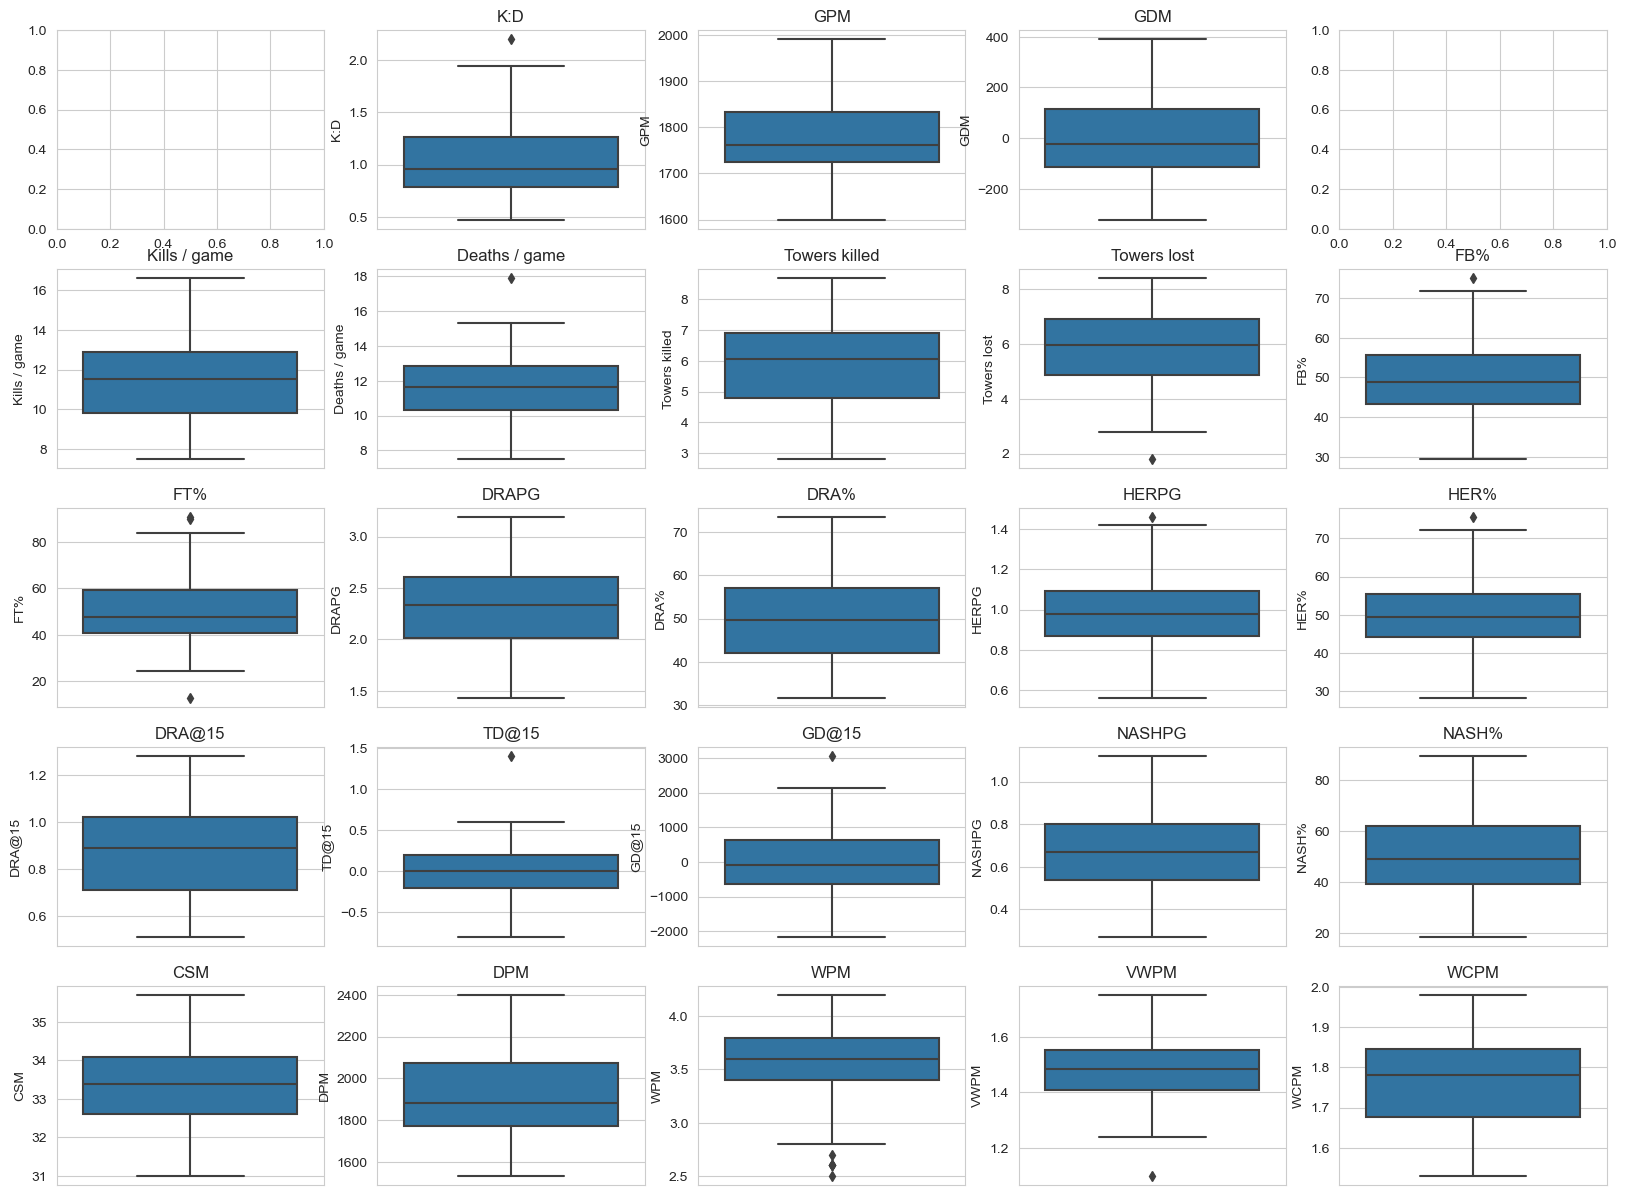

In [86]:
cols = clean_team_data.columns

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))

sns.boxplot(y=clean_team_data.iloc[:, 0], ax=axes[0, 1])
axes[0, 1].set_title(cols[0])

sns.boxplot(y=clean_team_data.iloc[:, 1], ax=axes[0, 2])
axes[0, 2].set_title(cols[1])

sns.boxplot(y=clean_team_data.iloc[:, 2], ax=axes[0, 3])
axes[0, 3].set_title(cols[2])

x, y = 1, 0
for i in range(3, 23):
    sns.boxplot(y=clean_team_data.iloc[:, i], ax=axes[x, y])
    axes[x, y].set_title(cols[i])
    
    y += 1
    
    if y != 0 and y % 5 == 0:
        y = 0
        x += 1
    
    
plt.show()

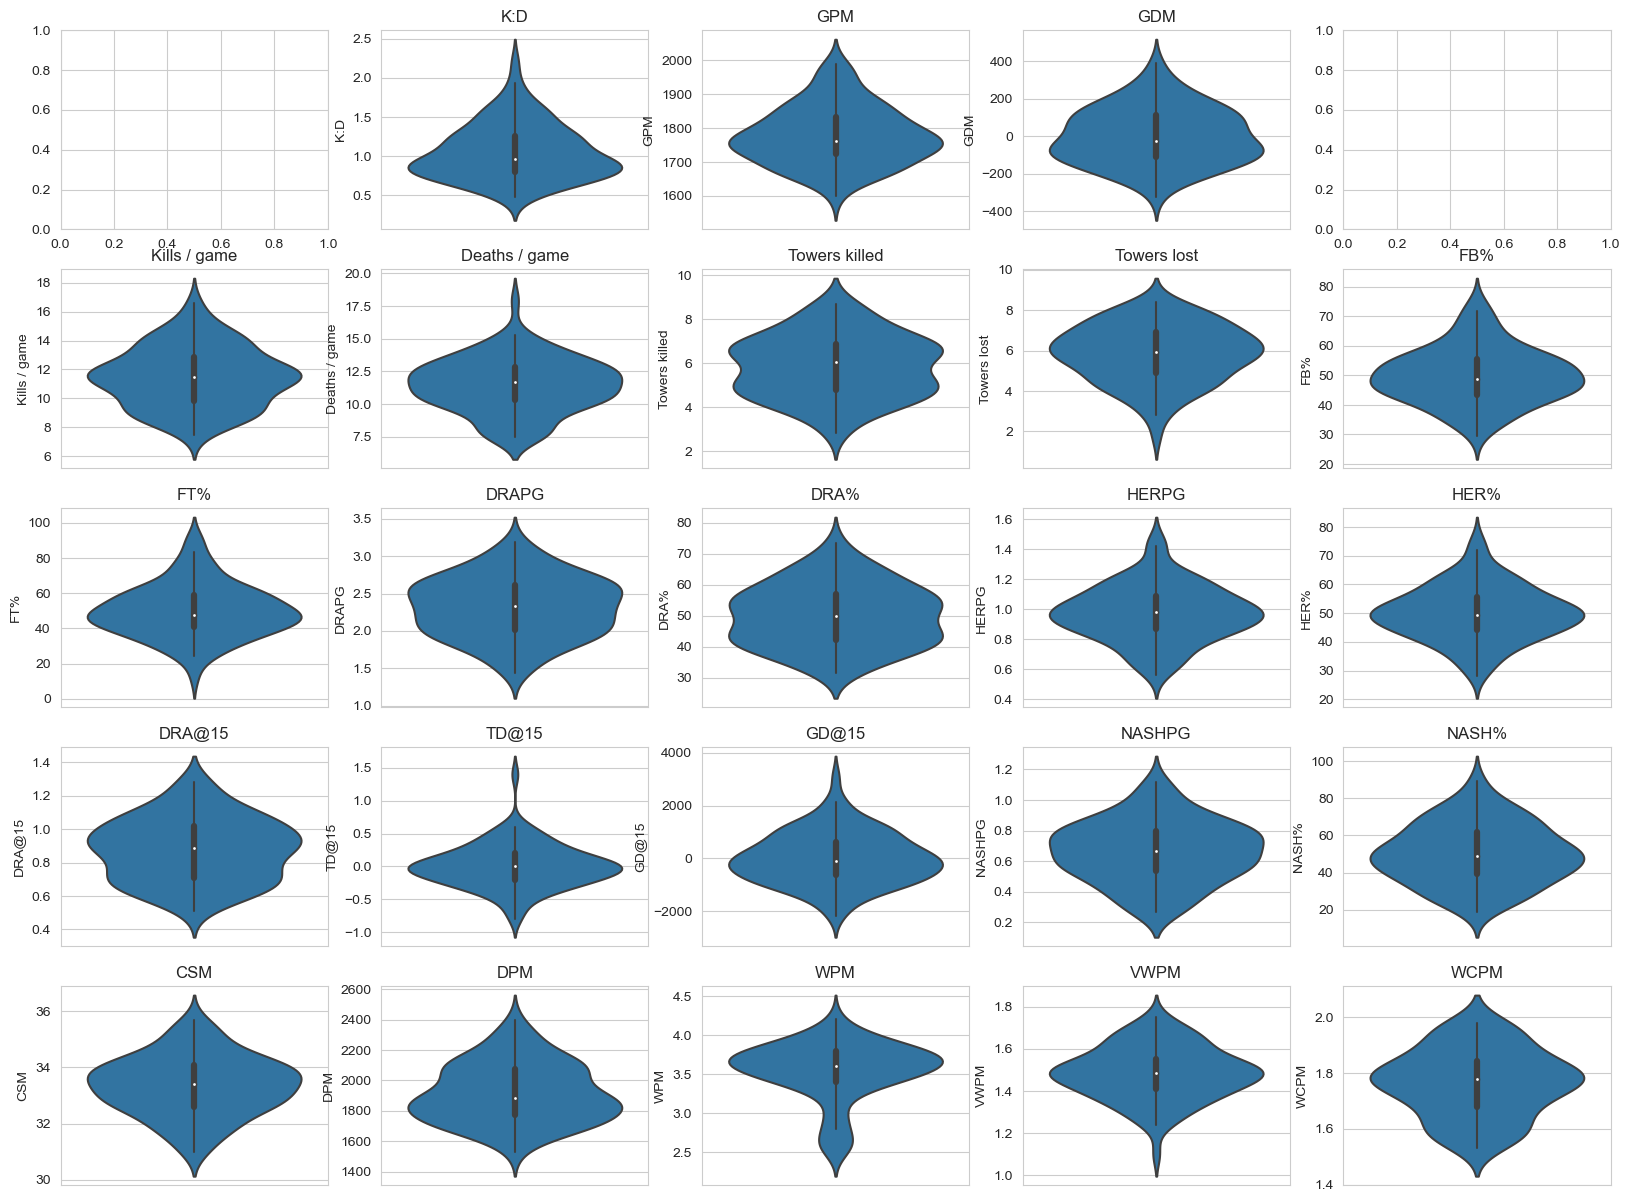

In [87]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))

sns.violinplot(y=clean_team_data.iloc[:, 0], ax=axes[0, 1])
axes[0, 1].set_title(cols[0])

sns.violinplot(y=clean_team_data.iloc[:, 1], ax=axes[0, 2])
axes[0, 2].set_title(cols[1])

sns.violinplot(y=clean_team_data.iloc[:, 2], ax=axes[0, 3])
axes[0, 3].set_title(cols[2])

x, y = 1, 0
for i in range(3, 23):
    sns.violinplot(y=clean_team_data.iloc[:, i], ax=axes[x, y])
    axes[x, y].set_title(cols[i])
    
    y += 1
    
    if y != 0 and y % 5 == 0:
        y = 0
        x += 1
    
    
plt.show()

In [28]:
scaler = preprocessing.StandardScaler()
norm_team_data = pd.DataFrame(scaler.fit_transform(clean_team_data), columns=clean_team_data.columns)

corr = norm_team_data.corr()


<Axes: >

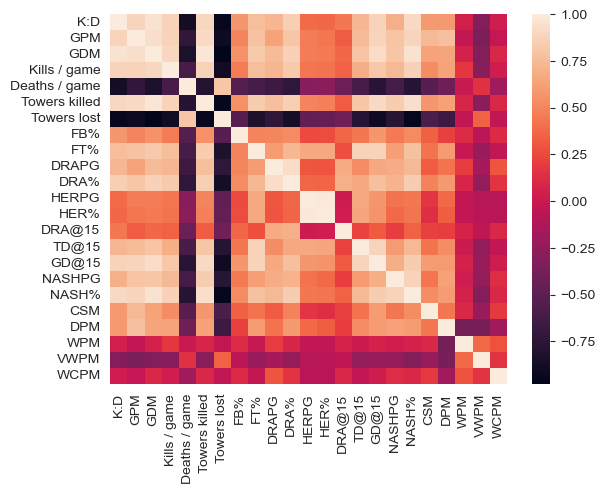

In [29]:
sns.heatmap(corr)

#### PCA

In [30]:
pca = PCA()
pca.fit(norm_team_data)

PCA()

[1.36086794e+01 2.22287259e+00 1.74113738e+00 1.12767052e+00
 8.35856105e-01 7.56964848e-01 6.61649267e-01 6.40264669e-01
 4.95486458e-01 3.53562701e-01 2.27630610e-01 1.57312979e-01
 1.28642557e-01 1.00379591e-01 6.21635060e-02 4.92516961e-02
 3.89177132e-02 2.64279427e-02 2.20768162e-02 1.25894859e-02
 1.04311690e-02 7.77530556e-03 3.39595383e-03]


D:\anaconda3\envs\master\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\envs\master\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

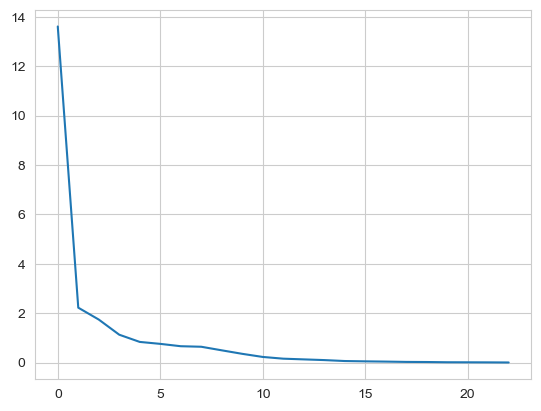

In [31]:
eigenvalue = pca.explained_variance_
print(eigenvalue)
sns.lineplot(eigenvalue)

In [32]:
ratio = pca.explained_variance_ratio_
print(ratio)

[5.84285691e-01 9.54385513e-02 7.47553549e-02 4.84162885e-02
 3.58873002e-02 3.25001212e-02 2.84077674e-02 2.74896244e-02
 2.12736034e-02 1.51801377e-02 9.77327076e-03 6.75419854e-03
 5.52324021e-03 4.30977590e-03 2.66897662e-03 2.11461087e-03
 1.67092355e-03 1.13467797e-03 9.47863303e-04 5.40526841e-04
 4.47859973e-04 3.33831054e-04 1.45804539e-04]


In [33]:
cumulated_ratio = np.array([ratio[:i+1].sum() for i, col in enumerate(norm_team_data.columns)])

D:\anaconda3\envs\master\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\envs\master\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


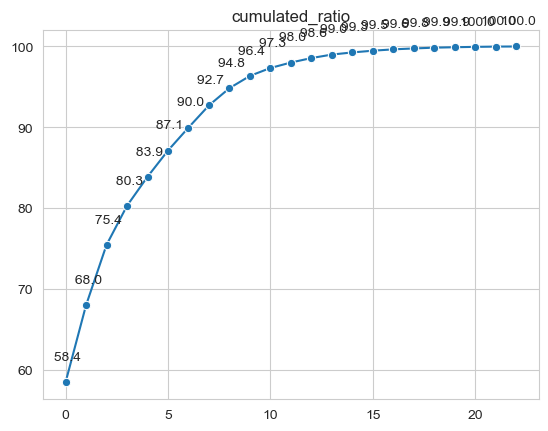

In [34]:
sns.lineplot(cumulated_ratio * 100, markers=True, marker="o")
for i, j in enumerate(cumulated_ratio * 100):
    plt.annotate("{0: .1f}".format(j), (i, j + 1), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.title("cumulated_ratio")
plt.show()

According to the cumulated ratio, we take n_components = 10

In [44]:
pca10 = PCA(n_components=10)
pca_team_array = pca10.fit_transform(norm_team_data)

In [45]:
print(pca10.explained_variance_ratio_)

[0.58428569 0.09543855 0.07475535 0.04841629 0.0358873  0.03250012
 0.02840777 0.02748962 0.0212736  0.01518014]


In [51]:
indexs = ['I', 'II', "III", "IV", 'V', 'VI', 'VII', 'VIII', 'IX', 'X']
pca_team_data = {}
for i, index in enumerate(indexs):
    pca_team_data[index] = pca_team_array[:, i]

df_pca_team = pd.DataFrame(pca_team_data)

<Axes: >

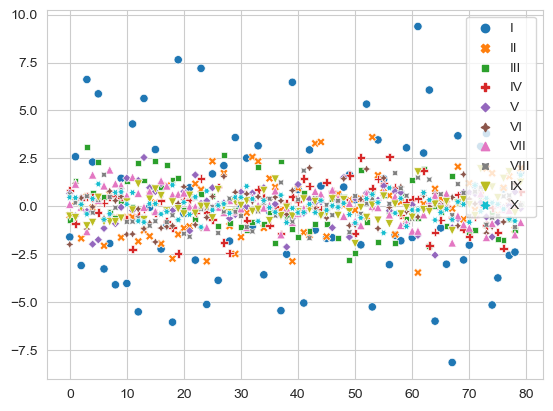

In [53]:
sns.scatterplot(pca_team_data)